# Sensitivity analysis

Three thousand simulations carried out with randomly chosen parameters for the number of distinct populations, the number of individuals within each population, the length of each time series, the strength of the lagging correlation within a population etc.

## Mutual information

Mutual information analysis below - looking for any association between the parameters and various different versions of the results.  The most useful formulation of the results turns out to be the most basic one and needs a little explanation. 

For each comparison between two time series, the number of marks is turned into a z-score using both $\sigma_1$ and $\sigma_2$. The mean is then taken of only those z-scores from two individuals within the same population and becomes the overall score for that run.  This is what the 'Z score mean' refers to, using only those individuals that would be expected to have some degree of lagging correlation within their time series. 

Other versions of the results have been tested to look for stronger association but no improvement is seen (generally information is lost).  The (variable) number of comparisons on which each mean z-score is based should be taken into account but attempting to include it seems to cause more problems.  I attempted to create a statistically valid weighted z-score and p-value based on scaling by the square root of the number of comparisons, using the null hypothesis of a normally distributed set of scores with null mean/std given by all comparisons which involved individuals from distinct populations.  Presumably the assumption of Normality is not good for the short time series used in these runs as this gave poor results.  MI for these other results is not displayed unless 'all_results' is set to True.  For a description of each parameter and the different types of results, set verbose to True.  

As the code stands, only the most basic form of the results is tabulated, with scattergraphs for those relationships showing the highest degree of mutual information.  The key parameter is the proportion of noise divided by the proportion of correlated 1s in the time series.  Using the logarithm of this ratio gives a reasonably linear relationship.

In [2]:
import sensitivity_analysis_functions as saf
import pandas as pd
print(pd.__version__)

df=pd.read_csv("..\Results\multiple_pop_correlations_index.csv",index_col=0)
# for explanations of parameters/results headings set verbose to True
# for MI comparisons against all versions of the results, set all_results to True
# to display more/fewer MI values, reduce/increase cutoff
# to display scattergraphs of all associations above cutoff value, set display_scattergraphs to True
saf.mutual_information_analysis(df,verbose=False,all_results=False,cutoff=0.1,display_scattergraphs=True)




0.20.3
Mutual information between parameters and mean z-scores for comparisons within populations using version 1/version 2 sigma


AttributeError: 'Series' object has no attribute 'to_numpy'

The only parameters that show significant association with both versions of sigma are the noise ratios (the log ratio will be relevant in the linear analysis below).  There is an association between the incidence mean and the v2 score, though not with the v1 score. The graphs between log(noise ratio) and mean Z-scores for both v1 and v2 sigma look reasonably elliptical so linear regression for these is carried out below.  There is a strong correlation with v1 sigma in particular.

The association with incidence mean (the average proportion of 1s in time series) and the Z score using $\sigma_2$ looks like it's to do with a reduction in the variability of the Z scores for time series with a high proportion of 1s.  Presumably any lagging correlations are being swamped by the number of marks that would appear by chance in this situation.  The table below shows a fairly high PMCC between incidence std deviation and the v2 score.  The colormap below uses the incidence mean to determine colour this also suggests that incidence mean is not a useful feature for predicting scores. 

### Linear regression

The table shows correlations ordered from most negative to most positive for each of the parameters (ordering based on $\sigma_1$ correlations).  There is a very strong negative correlation between the logarithm of the noise ratio and the v1 score, and a reasonable negative correlation between log(noise ratio) and the v2 score.  Lines of best fit are shown together with the $R^2$ scores for each version.  If another parameter name is passed, this will be used to create a colormap of the same data.

Based on the regression line, the relationship between the ratio R (of noise to correlated entries) and the expected strengths of the correlation given by the Z-scores $Z_1$ (for $\sigma_1$) and $Z_2$ (for $\sigma_2$) are given by 
$$ Z_1 \approx -0.62\ln(R) + 0.15   $$
$$ Z_2 \approx -0.12\ln(R) + 0.37   $$ 

To see both these results, the 'only_similar_individuals' parameter will need to be toggled.  If this parameter is False, all runs are included giving the most complete results using $\sigma_1$, but leaving a large noise element for $\sigma_2$.  If this parameter is True, only those runs that give meaningful analysis using $\sigma_2$ are included (where all individuals within a given population are drawn from the same incidence mean).

The explained variance is much higher for $\sigma_1$, as expected from previous results and from the theoretical work.  Using $\sigma_1$ generally gives cleaner results with higher Z-scores for correlated time series than using $\sigma_2$.


,Z score mean (v1_sigma),Z score mean (v2_sigma)
log ratio,-0.80,-0.58
expected noise:event ratio,-0.25,-0.12
incidence mean,-0.21,-0.56
individuals across populations similar,-0.11,-0.33
sqrt number_of_comparisons,-0.04,-0.14
number_of_comparisons,-0.02,-0.13
number of time series compared,-0.01,-0.11
incidence std,0.01,0.10
max lag,0.04,0.00
number of populations,0.04,0.06


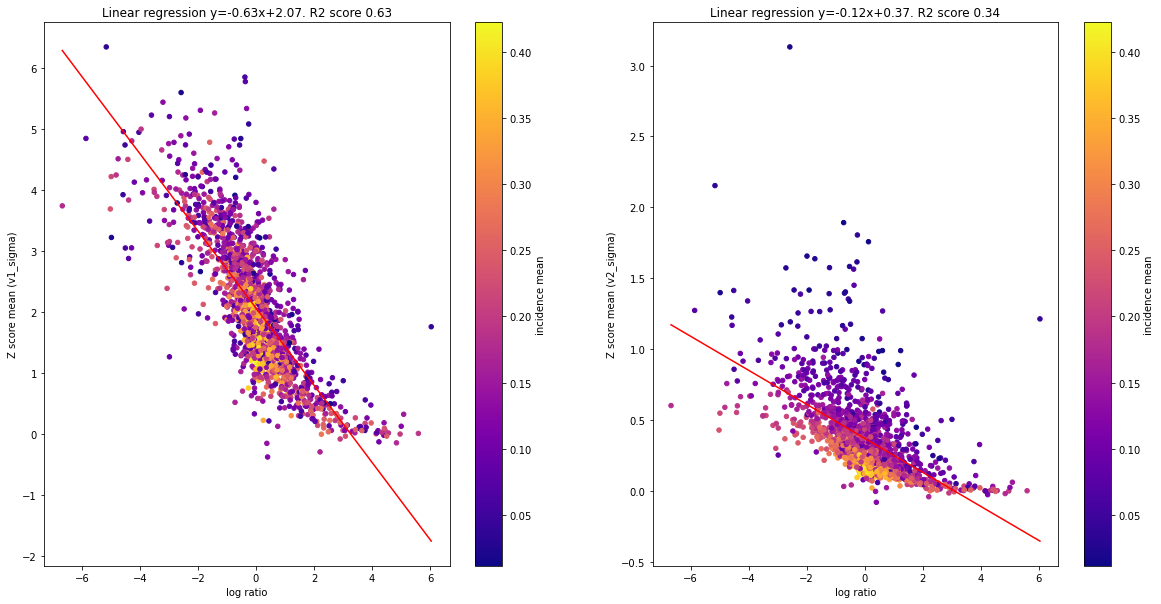

In [2]:
import sensitivity_analysis_functions as saf
import pandas as pd

df=pd.read_csv("..\Results\multiple_pop_correlations_index.csv",index_col=0)

# linear regression will be on the feature passed as 'regression_feature' (useful to see scattergraphs even if regression line not meaningful in most cases)
# if only_similar_individuals is True, half the runs will be discarded (those which cannot be meaningfully analysed using v2 sigma)
# if only_similar_individuals is False, all runs will be included (so half of the v2 sigma results will be noise).
# color_map_col can be changed to any feature parameter and will color the scatterplot by this parameter.
saf.linear_regression_analysis(df,regression_feature = 'log ratio', only_similar_individuals = True,
                               color_map_col = 'incidence mean')


The 'tail' is to be expected - as the ratio increases, the noise starts to swamp any lagging correlations, so the z-scores tend to zero and cannot keep decreasing.  If this tail was removed, the $R^2$ score should be higher, but as the Normal approximation doesn't hold well for these shorter time series, I couldn't figure out how to do this other than by an arbitrary cut-off.  The v1 correlation is much stronger than the v2 correlation, as expected from earlier work.